Importing Packages****

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV file

In [29]:
data = pd.read_csv("Student Mental health.csv")


Looking into data.

In [30]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Checking shape of data.

In [31]:
data.shape

(101, 11)

What features we are having?

In [32]:
data.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

It looks like we really don't need Timestamp in our data, it does not add any value. So, we will delete this column.

In [33]:
del data['Timestamp']
data.columns

Index(['Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

Well!, other features looks good but we can rename them for our convinience.

In [34]:
data.columns = ['gender', 'age', 'course','study_year', 'cgpa','marital_status', 'depression', 'anxiety', 'panic_attacks', 'treatment']

In [35]:
data.head()

,gender,age,course,study_year,cgpa,marital_status,depression,anxiety,panic_attacks,treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Now let's check - is there any miising values present?

In [36]:
data.isnull().any()

gender            False
age                True
course            False
study_year        False
cgpa              False
marital_status    False
depression        False
anxiety           False
panic_attacks     False
treatment         False
dtype: bool

It looks like, age is having a miising value. Let fill it with a median.

In [37]:
data['age']  = data['age'].fillna(data['age'].median())
data['age'].isnull().any()

False

Now, it looks good.

Ok. Now, we should start exploring data. First we should check- how much biased our data is?. Well! we have very less data in our hand. So, we can not make very effective conclusions but just for fun of exploring data, we can imagine that is all the data we have for this topic.

Ok. Now, first have a look in "gender".

<AxesSubplot:xlabel='gender', ylabel='count'>

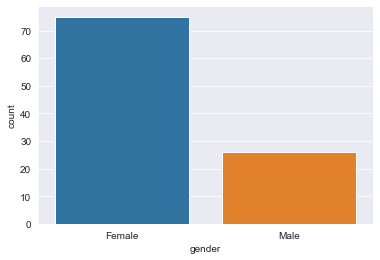

In [38]:
sns.countplot(x='gender', data= data)

Ok. We can see that, we have data on Females much more than male. So, this data is gonna'be biased towards female.

In [39]:
data['gender'].value_counts()

Female    75
Male      26
Name: gender, dtype: int64

We have 75 data points on female and 26 data points on male. Now, lets have a look on 'study_year' and 'age.

Now we should have look into 'study_year'.

<AxesSubplot:xlabel='study_year', ylabel='count'>

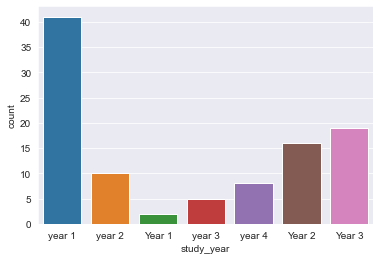

In [40]:
# study_year
sns.countplot(x= 'study_year', data=data)

Ok, it looks we have some problem with our data. Well ! data is seperated due to spelling errors. It's time to do some data wrangling. we will convert names of year's into just numbers like Year 1 to 1, year 2 to 2. etc.

In [41]:
data['study_year']  = data['study_year'].str[-1:]
data['study_year'].value_counts()

1    43
2    26
3    24
4     8
Name: study_year, dtype: int64

<AxesSubplot:xlabel='study_year', ylabel='count'>

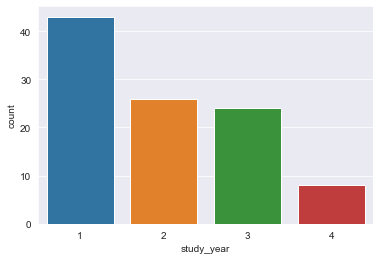

In [42]:
sns.countplot(x= 'study_year', data=data)

Ok. Now it looks fine. Now we can see that, students from first year participated more in this survey i.e 43 student from 1st year, 26 students from 2nd year, 24 from 3rd year and 8 students from 4th year. So, data we have have is more biased towards the early year of college.

Now, we should have a look on 'age'.

<AxesSubplot:xlabel='age', ylabel='count'>

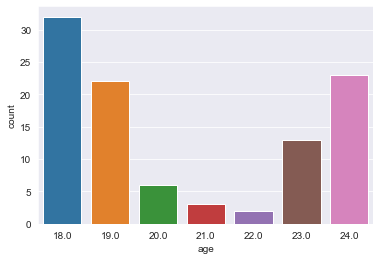

In [43]:
sns.countplot(x='age', data= data)

Now, we can see the 'age' ranges between 18 and 24.

In [44]:
#get columns
data.columns

Index(['gender', 'age', 'course', 'study_year', 'cgpa', 'marital_status',
       'depression', 'anxiety', 'panic_attacks', 'treatment'],
      dtype='object')

Ok, Let's focus on depression first, we want to explore this data, keeping 'depression' in the center and will try to find out, what are the factors effecting it? 


In [45]:
# finding no. of students suuffering from depression
data['depression'].value_counts()

No     66
Yes    35
Name: depression, dtype: int64

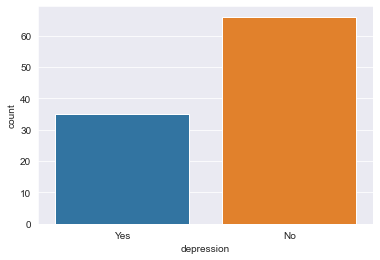

In [46]:
sns.set_style('darkgrid')
sns.countplot(x='depression', data= data)
plt.show()


Almost half of the students suffering from depression.

Let's have look on 'depression' on the basis of 'gender'.

In [47]:
data[['gender', 'depression']].value_counts()

gender  depression
Female  No            46
        Yes           29
Male    No            20
        Yes            6
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

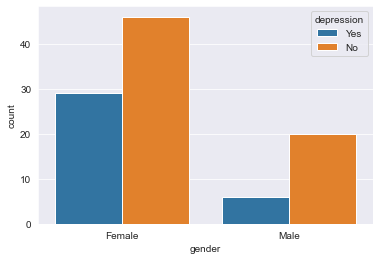

In [48]:
sns.countplot(x='gender', hue= 'depression', data= data )

Well! the above plot shows that female students are more depressed than male students, but we can not reach into this conlusion unless we have more unbiased data. 

Now we thik of some other questions like

-does 'marital_status' have something to do with student's mental health ?

-does 'age have something' to do with student's mental health ?

-we can also look for any relation between 'depression' and 'anxiety'.

In [49]:
data[['marital_status', 'depression']].value_counts(), data['marital_status'].value_counts()

(marital_status  depression
 No              No            66
                 Yes           19
 Yes             Yes           16
 dtype: int64,
 No     85
 Yes    16
 Name: marital_status, dtype: int64)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

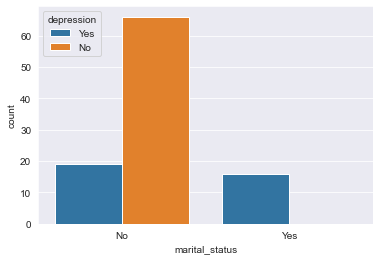

In [50]:
sns.countplot(x='marital_status', hue= 'depression', data= data )

Wow!, this is some amazing finding, it seems all married students have deppression.

We can see above, there are 16 students who are married and they all are having depression.Now, we can look into next quesion- does 'age' effect mental health ?

<AxesSubplot:xlabel='age', ylabel='count'>

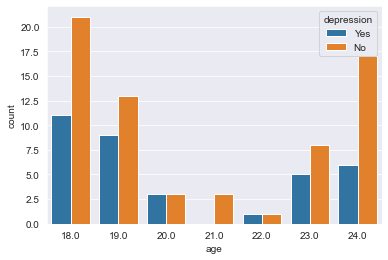

In [51]:
sns.countplot(x='age', hue= 'depression', data= data )

According to this data, it looks age do not have much impact on our mental health.

<AxesSubplot:xlabel='depression', ylabel='count'>

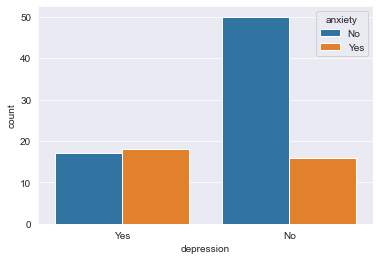

In [52]:
# depression and anxiety
sns.countplot(x='depression', hue= 'anxiety', data= data )

Well! it looks like those who are suffering from "Depression", have more chances of having  "Anxiety".
In fact, after browsing Google, We found out -

"most mood disorders present as a combination of anxiety and depression. Surveys show that 60-70% of those with depression also have anxiety. And half of those with chronic anxiety also have clinically significant symptoms of depression."

Findings-
1) marriage does effect mental health
2) anxiety can be the outcome of depression (those who are suffering from "Depression", have more chances of having  "Anxiety").